In [278]:
%pylab inline
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [279]:
filePath_rw = './winequality-red.csv'
filePath_ww = './winequality-white.csv'
red_wine_data = pd.read_csv(filePath_rw , sep=";", header=0)
white_wine_data = pd.read_csv(filePath_ww, sep=";", header=0)

In [280]:
len(red_wine_data)

1599

In [281]:
len(white_wine_data)

4898

In [282]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1) Data Set Description
___

a) __Summary__  
    This DataSet is one of two datasets that were created using red and white wine samples. The features are objective measurements of the composition of the wines. The output { quality } or as shall be further on infered as the class is based on sensory data. This is a median of evaluations given by three wine expert on each instance of wine.  
b) __Features (11 features + 1 class)__  
   1 - fixed acidity  
   2 - volatile acidity  
   3 - citric acid  
   4 - residual sugar  
   5 - chlorides  
   6 - free sulfur dioxide  
   7 - total sulfur dioxide  
   8 - density  
   9 - pH  
   10 - sulphates  
   11 - alcohol  
   Output variable (based on sensory data):  
   12 - quality (score between 0 and 10)  
c) __Number of Instances : 4898 __  
d) __Nature of Data__  
    + Features are numerical, with continous data however the target or class in discrete  
    + There no missing attribute values  
    
e) __Distribution of samples__  
    + classes are ordered and not balanced.  
        + Note : Would have to apply shuffling and stratified data sampling to select training data  

In [283]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [284]:
columns = white_wine_data.columns

## 2) Data Analysis of White Wine Data

### Data Description, Boxplots and Histogram

#### Class Attribute

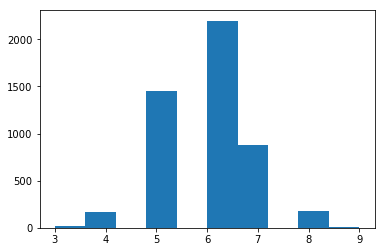

In [285]:
plt.hist(white_wine_data["quality"])
plt.autoscale()
plt.show()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


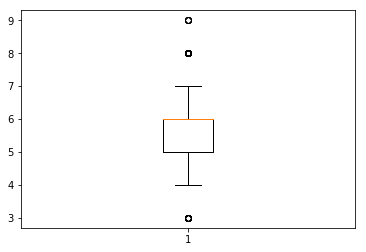

In [286]:
print(white_wine_data["quality"].describe())
plt.boxplot(white_wine_data["quality"])
plt.show()

#### Interpretation : 
__ This shows that the distribution of the class in the data is not normal. In some instances we do not have enough instances representing certain target attributes. This will affect the performance of the model. Furthermore there seems to be more representaion of normal wines, than poor or excellent wines. As shown buy the box plot. This could cause some overfiting issues as the model does not train on enough instances that are excellent or poor. __

### Features

fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed acidity, dtype: float64


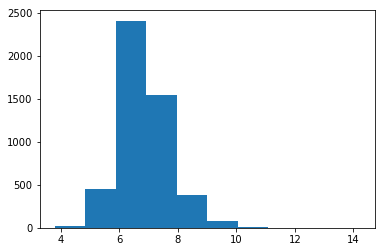

volatile acidity
count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64


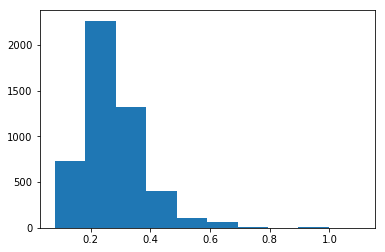

citric acid
count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64


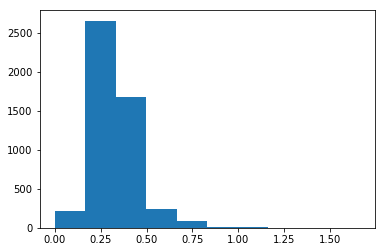

residual sugar
count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64


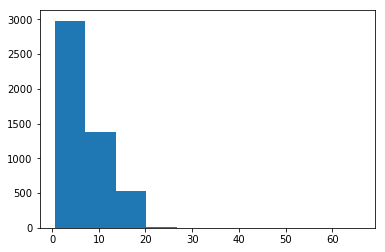

In [287]:
# histograms for all the features in the dataset
for column in columns[:4]:
    print(column)
    print(white_wine_data[column].describe())
    plt.hist(white_wine_data[column])
    plt.autoscale
    plt.show()

chlorides
count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64


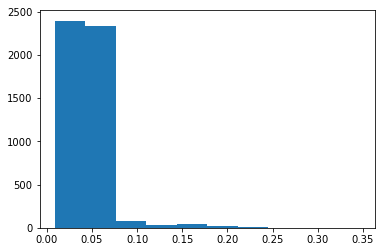

free sulfur dioxide
count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64


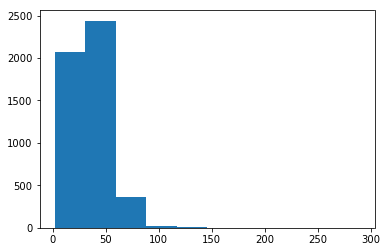

total sulfur dioxide
count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64


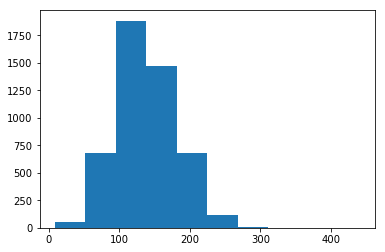

density
count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64


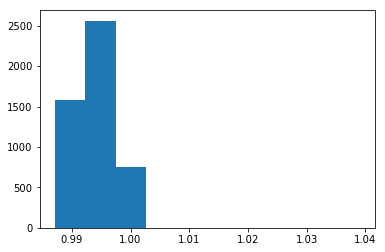

In [288]:
for column in columns[4:8]:
    print(column)
    print(white_wine_data[column].describe())
    plt.hist(white_wine_data[column])
    plt.autoscale
    plt.show()

pH
count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64


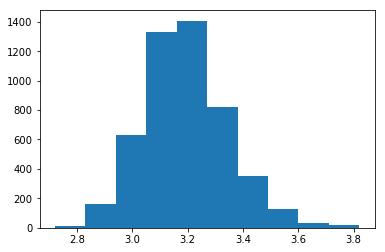

sulphates
count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64


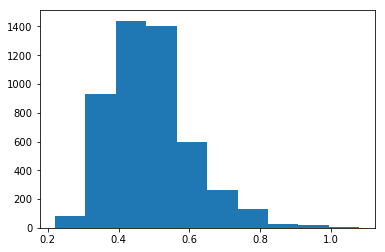

alcohol
count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64


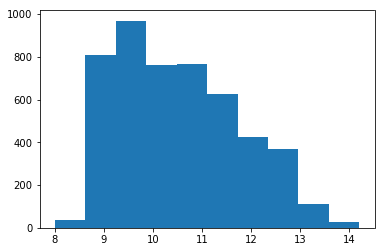

In [289]:
for column in columns[8:11]:
    print(column)
    print(white_wine_data[column].describe())
    plt.hist(white_wine_data[column])
    plt.autoscale
    plt.show()
    

## Now that we have the histograms showing distribution
### Lets examine the boxplots to see if there any features with outliers

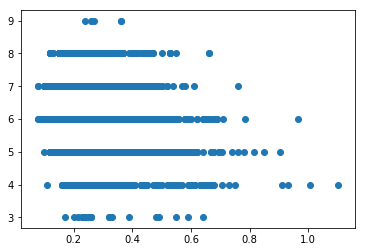

In [290]:
plt.scatter(white_wine_data['volatile acidity'], white_wine_data['quality'])

fixed acidity


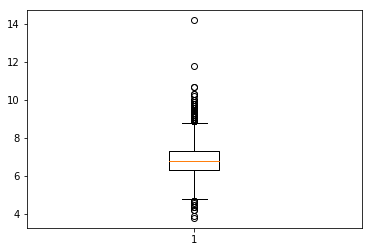

volatile acidity


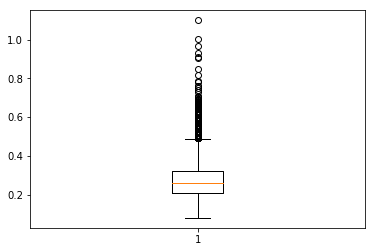

citric acid


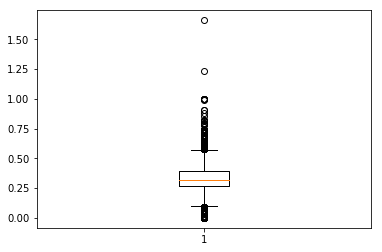

residual sugar


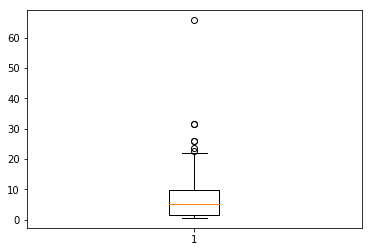

In [291]:
for column in columns[:4]:
    print(column)
    plt.boxplot(white_wine_data[column])
    plt.show()

chlorides


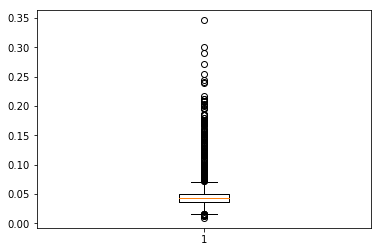

free sulfur dioxide


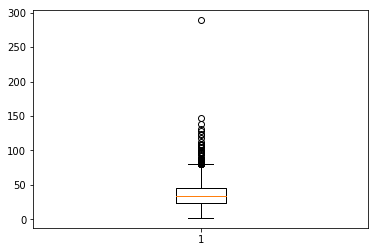

total sulfur dioxide


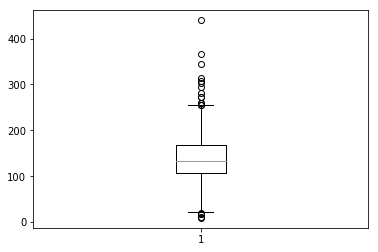

density


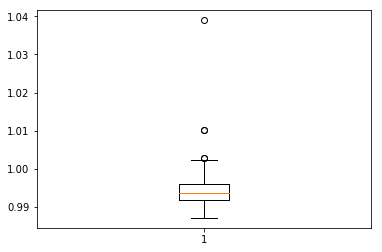

In [292]:
for column in columns[4:8]:
    print(column)
    plt.boxplot(white_wine_data[column])
    plt.show()

pH


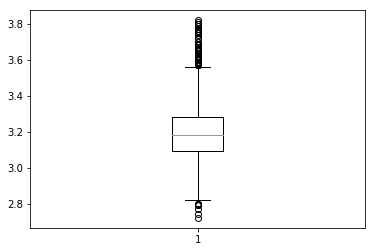

sulphates


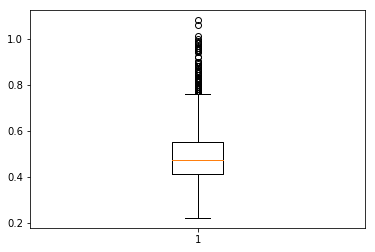

alcohol


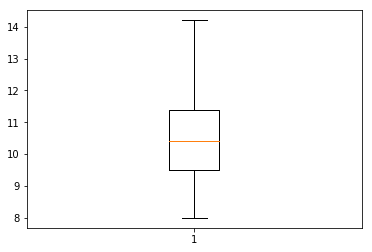

In [293]:
for column in columns[8:11]:
    print(column)
    plt.boxplot(white_wine_data[column])
    plt.show()

In [294]:
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Features with outliers 
1. fixed acidity
2. volatile acidity
3. citric acid 
4. residual sugar
5. chlorides
6. free sulfur dioxides
7. total sulfur dioxide 
8. density
9. ph
10. sulphates 

-
keep in mind that Decision tree classifier does not support missing values


### 3) Use Decision TreeClassification

+ Need to perfrom stratified shuffle sampling. To compersate for the order and unbalanced data in instances

In [295]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [296]:
x = white_wine_data[:]
del x['quality']
y = white_wine_data['quality']

In [297]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [298]:
print("{} shape is {}".format("x", x.shape))
print("{} shape is {}".format("y", y.shape))

x shape is (4898, 11)
y shape is (4898,)


In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.7, random_state=0)

In [300]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [301]:
import graphviz

In [302]:
feature_columns = list(columns)
feature_columns.remove('quality')

In [303]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=feature_columns, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("White Wine")

'White Wine.pdf'

### Using Decision Tree Regression on the same Data

In [304]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(X_train, Y_train)

In [305]:
dot_data2 = tree.export_graphviz(clf2, 
                                out_file=None,
                                feature_names=feature_columns,
                                filled=True,
                                impurity=True,
                                rounded=True, 
                                special_characters=False)
graph2 = graphviz.Source(dot_data2)
graph2.render("White Wine Entropy")

'White Wine Entropy.pdf'

In [306]:
test_instance = X_test[:1]
actual = Y_test[:1]
actual =int(actual)

In [307]:
predicted_target = int(clf.predict(test_instance))
predicted_target2 = int(clf2.predict(test_instance))

In [308]:
print('Gini Criterion Predicted Value  : {}  and Actual Value : {}'.format(predicted_target, str(actual)))
print('Information Gain Predicted Value     : {}  and Actual Value : {}'.format(predicted_target2, str(actual)))

Gini Criterion Predicted Value  : 7  and Actual Value : 5
Information Gain Predicted Value     : 6  and Actual Value : 5


In [309]:
test_instance

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2762,7.3,0.32,0.35,1.4,0.05,8.0,163.0,0.99244,3.24,0.42,10.7


### Using the Graph White Wine Entropy.pdf
+ ___To explain how the predicted value of 6 was established___

+ Root feature is Alchohol  
    - 10.7 <= 10.85 - True  go left 
+ Next feature is Volatile acidity  
    - 0.32 > 0,282 - False  go right 
+ Next feature is free sulphur dioxide
    - 8 <= 10.5  - True - go left 
+ Next feature is residual sugar 
    - 1.4 < 3.9 - True - go left 
+ Next feature is Volatile acidity  
    - 0.32 < 0.37 - true - go left 
+ Next feature is citric acid
    - 0.35 < 0.515 - true - go left
+ Leaf - value == 3 

* __ This does not make sense to me because the volatile acidity node was encoutered twice in the same path, and the resultant node from following the decision tree was value 3 not the 6 that was returned__